#  导入数据分析库

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")
import missingno as msno

### 定义reduce_mean_usage 函数通过调整数据

In [9]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() 
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() 
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

# 读取数据，划分训练集，测试集

In [10]:
sample_feature = reduce_mem_usage(pd.read_csv('data_train.csv'))

Memory usage of dataframe is 402000080.00 MB
Memory usage after optimization is: 54450080.00 MB
Decreased by 86.5%


In [11]:
sample_feature.head()

,SaleID,kilometer,name,offerType,power,price,seller,v_0,v_1,v_10,...,fuelType_5.0,fuelType_6.0,gearbox_0.0,gearbox_1.0,notRepairedDamage_-,notRepairedDamage_0.0,notRepairedDamage_1.0,notRepairedDamage_-.1,notRepairedDamage_0.0.1,notRepairedDamage_1.0.1
0,0,0.928223,736,0,4.109375,1850,0,43.34375,3.966797,-2.880859,...,0,0,1,0,0,1,0,0,1,0
1,1,1.000000,2262,0,0.000000,3600,0,45.31250,5.234375,-4.902344,...,0,0,1,0,1,0,0,1,0,0
2,2,0.928223,14874,0,5.101562,6222,0,45.96875,4.824219,-4.847656,...,0,0,1,0,0,1,0,0,1,0
3,3,1.000000,71865,0,5.269531,2400,0,45.68750,4.492188,-4.507812,...,0,0,0,1,0,1,0,0,1,0
4,4,0.585449,111080,0,4.234375,5200,0,44.37500,2.031250,-1.896484,...,0,0,1,0,0,1,0,0,1,0


In [12]:
sample_feature.columns

Index(['SaleID', 'kilometer', 'name', 'offerType', 'power', 'price', 'seller',
       'v_0', 'v_1', 'v_10',
       ...
       'fuelType_5.0', 'fuelType_6.0', 'gearbox_0.0', 'gearbox_1.0',
       'notRepairedDamage_-', 'notRepairedDamage_0.0', 'notRepairedDamage_1.0',
       'notRepairedDamage_-.1', 'notRepairedDamage_0.0.1',
       'notRepairedDamage_1.0.1'],
      dtype='object', length=335)

In [13]:
train_y=sample_feature['price']

In [17]:
train_x=sample_feature.drop(['price'],axis=1)

In [18]:
train_x.shape,train_y.shape

((150000, 334), (150000,))

In [24]:
continuous_feature_names = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14']

In [25]:
continuous_feature_names

['power',
 'kilometer',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14']

In [26]:
train_X = train_x[continuous_feature_names]
#train_y = train['price']

In [28]:
train_X = train_X.dropna().replace('-', 0).reset_index(drop=True)

# 简单线性回归

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
model = model.fit(train_X, train_y)

In [30]:
from matplotlib import pyplot as plt
subsample_index = np.random.randint(low=0, high=len(train_y), size=50)

The predicted price is obvious different from true price


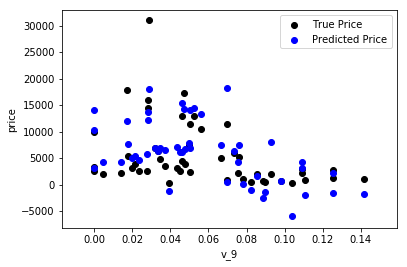

In [31]:
plt.scatter(train_X['v_9'][subsample_index], train_y[subsample_index], color='black')
plt.scatter(train_X['v_9'][subsample_index], model.predict(train_X.loc[subsample_index]), color='blue')
plt.xlabel('v_9')
plt.ylabel('price')
plt.legend(['True Price','Predicted Price'],loc='upper right')
print('The predicted price is obvious different from true price')
plt.show()

It is clear to see the price shows a typical exponential distribution


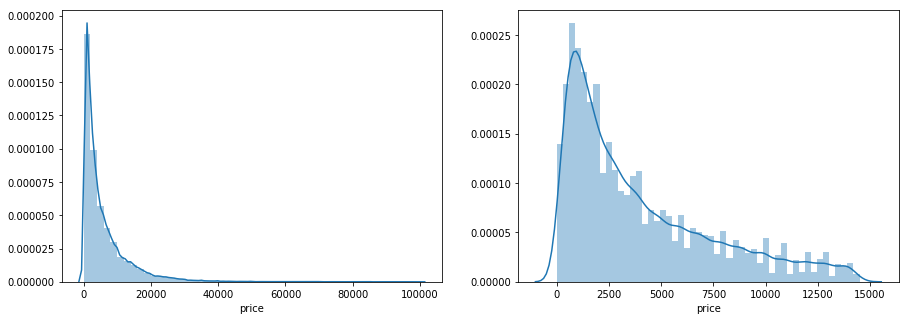

In [32]:
import seaborn as sns
print('It is clear to see the price shows a typical exponential distribution')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train_y)
plt.subplot(1,2,2)
sns.distplot(train_y[train_y < np.quantile(train_y, 0.9)])

The transformed price seems like normal distribution


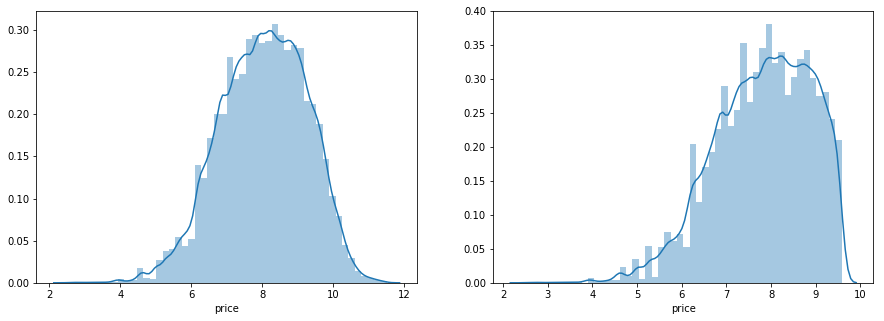

In [33]:
train_y_ln = np.log(train_y + 1)
import seaborn as sns
print('The transformed price seems like normal distribution')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train_y_ln)
plt.subplot(1,2,2)
sns.distplot(train_y_ln[train_y_ln < np.quantile(train_y_ln, 0.9)])

In [34]:
model = model.fit(train_X, train_y_ln)

print('intercept:'+ str(model.intercept_))
sorted(dict(zip(continuous_feature_names, model.coef_)).items(), key=lambda x:x[1], reverse=True)

intercept:14.282257807109549


[('v_9', 11.685681708180923),
 ('v_5', 11.3497492234601),
 ('v_2', 3.3063184039367264),
 ('v_7', 2.614249571719698),
 ('v_1', 1.506850557399713),
 ('v_13', 0.48765626749167634),
 ('power', 0.020699825307729285),
 ('v_0', 0.010292525554080218),
 ('v_14', 0.004241786105852975),
 ('kilometer', -0.06747012326015393),
 ('v_4', -0.6730998755622069),
 ('v_3', -1.3199107025792285),
 ('v_11', -1.6201313393032586),
 ('v_10', -1.695344308559631),
 ('v_12', -2.291675936092771),
 ('v_8', -33.019571720350186),
 ('v_6', -194.56849524982746)]

# 五折交叉验证

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,  make_scorer

In [36]:
def log_transfer(func):
    def wrapper(y, yhat):
        result = func(np.log(y), np.nan_to_num(np.log(yhat)))
        return result
    return wrapper

In [37]:
scores = cross_val_score(model, X=train_X, y=train_y, verbose=1, cv = 5, scoring=make_scorer(log_transfer(mean_absolute_error)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s finished


In [38]:
print('AVG:', np.mean(scores))

AVG: 1.5267189644978916


In [39]:
scores = cross_val_score(model, X=train_X, y=train_y_ln, verbose=1, cv = 5, scoring=make_scorer(mean_absolute_error))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished


In [40]:
print('AVG:', np.mean(scores))

AVG: 0.20048477479043242


In [41]:
scores = pd.DataFrame(scores.reshape(1,-1))
scores.columns = ['cv' + str(x) for x in range(1, 6)]
scores.index = ['MAE']
scores

,cv1,cv2,cv3,cv4,cv5
MAE,0.200324,0.200379,0.201417,0.198103,0.202201


# LASSO回归，岭回归

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [43]:
models = [LinearRegression(),
          Ridge(),
          Lasso()]

In [45]:
result = dict()
for model in models:
    model_name = str(model).split('(')[0]
    scores = cross_val_score(model, X=train_X, y=train_y_ln, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error))
    result[model_name] = scores
    print(model_name + ' is finished')

LinearRegression is finished
Ridge is finished
Lasso is finished


In [46]:
result = pd.DataFrame(result)
result.index = ['cv' + str(x) for x in range(1, 6)]
result

,LinearRegression,Ridge,Lasso
cv1,0.200324,0.206306,0.478979
cv2,0.200379,0.206932,0.476318
cv3,0.201417,0.207283,0.480596
cv4,0.198103,0.204054,0.469474
cv5,0.202201,0.208286,0.477185


intercept:14.282257807110362


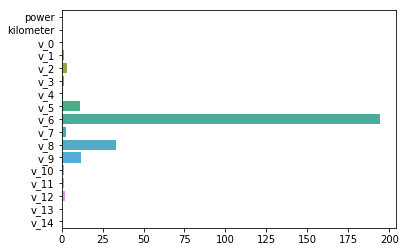

In [47]:
model = LinearRegression().fit(train_X, train_y_ln)
print('intercept:'+ str(model.intercept_))
sns.barplot(abs(model.coef_), continuous_feature_names)

intercept:-0.24537980096912548


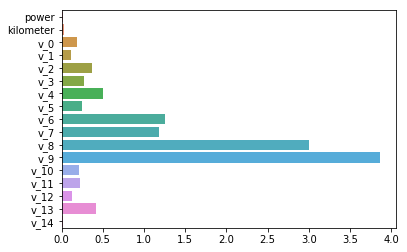

In [48]:
model = Ridge().fit(train_X, train_y_ln)
print('intercept:'+ str(model.intercept_))
sns.barplot(abs(model.coef_), continuous_feature_names)

intercept:2.6029306512558064


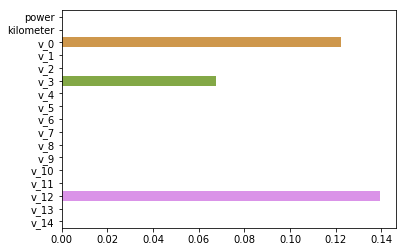

In [49]:
model = Lasso().fit(train_X, train_y_ln)
print('intercept:'+ str(model.intercept_))
sns.barplot(abs(model.coef_), continuous_feature_names)

# 非线性模型

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor

In [53]:
models = [LinearRegression(),
          DecisionTreeRegressor(),
          RandomForestRegressor(),
          GradientBoostingRegressor(),
          MLPRegressor(solver='lbfgs', max_iter=100), 
          XGBRegressor(n_estimators = 100), 
          LGBMRegressor(n_estimators = 100)]

In [54]:
result = dict()
for model in models:
    model_name = str(model).split('(')[0]
    scores = cross_val_score(model, X=train_X, y=train_y_ln, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error))
    result[model_name] = scores
    print(model_name + ' is finished')

LinearRegression is finished
DecisionTreeRegressor is finished
RandomForestRegressor is finished
GradientBoostingRegressor is finished
MLPRegressor is finished
XGBRegressor is finished
LGBMRegressor is finished


In [55]:
result = pd.DataFrame(result)
result.index = ['cv' + str(x) for x in range(1, 6)]
result

,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,MLPRegressor,XGBRegressor,LGBMRegressor
cv1,0.200324,0.205411,0.158079,0.184780,0.205557,0.184887,0.166467
cv2,0.200379,0.206171,0.157076,0.185158,0.194136,0.184599,0.168072
cv3,0.201417,0.207270,0.157785,0.186225,0.192730,0.186446,0.167698
cv4,0.198103,0.205567,0.156393,0.182610,0.191925,0.182688,0.164955
cv5,0.202201,0.203894,0.156850,0.186261,0.203298,0.186984,0.168150


# 网格调参

In [56]:
from sklearn.model_selection import GridSearchCV

In [59]:
objective = ['regression', 'regression_l1', 'mape', 'huber', 'fair']

num_leaves = [3,5,10,15,20,40, 55]
max_depth = [3,5,10,15,20,40, 55]
bagging_fraction = []
feature_fraction = []
drop_rate = []

In [60]:
parameters = {'objective': objective , 'num_leaves': num_leaves, 'max_depth': max_depth}
model = LGBMRegressor()
clf = GridSearchCV(model, parameters, cv=5)
clf = clf.fit(train_X, train_y)

In [61]:
clf.best_params_

{'max_depth': 40, 'num_leaves': 55, 'objective': 'regression'}

In [62]:
model = LGBMRegressor(objective='regression',
                          num_leaves=55,
                          max_depth=15)

In [63]:
np.mean(cross_val_score(model, X=train_X, y=train_y_ln, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error)))

0.1626774821015084

In [64]:
test = reduce_mem_usage(pd.read_csv('data_test.csv'))

Memory usage of dataframe is 134400080.00 MB
Memory usage after optimization is: 18550080.00 MB
Decreased by 86.2%


In [65]:
test_X = test[continuous_feature_names]

In [66]:
model.predict(test_X)

NotFittedError: Estimator not fitted, call `fit` before exploiting the model.